In [1]:
import pandas as pd
import numpy as np
import rdkit
import matplotlib.pyplot as plt
import re
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
#CSV Flavonoides
df = pd.read_csv("flavonoids_data.csv")
df.head()

,ChEBI ID,ChEBI Name,SMILES,PubChem SID
0,177972,"3,4,5-trihydroxy-6-{[5,6,7-trihydroxy-2-(4-hyd...",O1C(OC2=C(OC3=C(C2=O)C(O)=C(O)C(O)=C3)C4=CC(OC...,SID: 85377015\nCID: 131835070
1,191634,Neoliquiritin 2''-apioside,O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...,SID: 85390422\nCID: 131752849
2,186794,Haploside F,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=C(O)C=3OC(=C...,SID: 85385648\nCID: 44260005
3,197154,Sagittatoside A,O([C@@H]1[C@H](O)[C@@H](O)[C@@H](O[C@H]1OC2=C(...,SID: 85395895\nCID: 13916054
4,188752,Diosmetin 7-O-beta-D-glucopyranoside,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1OC=2...,SID: 85387578\nCID: 11016019


In [75]:
# Separar SID de CID mediante expresiones regulares
def extract_sid_cid(row):
    if pd.isna(row):
        return None, None
    sid_match = re.search(r'SID:\s*(\d+)', str(row))
    cid_match = re.search(r'CID:\s*(\d+)', str(row))
    sid = sid_match.group(1) if sid_match else None
    cid = cid_match.group(1) if cid_match else None
    return sid, cid

# Aplicar la función a la columna que contiene información de SID y CID
df['SID'], df['CID'] = zip(*df['PubChem SID'].apply(extract_sid_cid))
# Mostrar el DataFrame con las nuevas columnas SID y CID
df[["PubChem SID",'SID', 'CID']].sample(n=4)

,PubChem SID,SID,CID
159,SID: 85386031\nCID: 90657201,85386031,90657201
1057,SID: 85383449\nCID: 73810292,85383449,73810292
318,CID: 131833694\nSID: 85368754,85368754,131833694
463,SID: 85384804\nCID: 44257654,85384804,44257654


In [76]:
df = df.drop("PubChem SID", axis=1)
df.head()

,ChEBI ID,ChEBI Name,SMILES,SID,CID
0,177972,"3,4,5-trihydroxy-6-{[5,6,7-trihydroxy-2-(4-hyd...",O1C(OC2=C(OC3=C(C2=O)C(O)=C(O)C(O)=C3)C4=CC(OC...,85377015,131835070
1,191634,Neoliquiritin 2''-apioside,O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...,85390422,131752849
2,186794,Haploside F,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=C(O)C=3OC(=C...,85385648,44260005
3,197154,Sagittatoside A,O([C@@H]1[C@H](O)[C@@H](O)[C@@H](O[C@H]1OC2=C(...,85395895,13916054
4,188752,Diosmetin 7-O-beta-D-glucopyranoside,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1OC=2...,85387578,11016019


In [4]:
# Obtener la columna SMILES del DataFrame
smiles_column = df["SMILES"]
# Inicializar un contador para el número de moléculas reconocidas correctamente
num_molecules_recognized = 0
# Verificar cada SMILES con RdKit
for smiles in smiles_column:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        num_molecules_recognized += 1
    else:
        print(f"SMILES: {smiles} - No se pudo reconocer")

# Imprimir el número total de moléculas reconocidas correctamente
print(f"Total de moléculas reconocidas correctamente: {num_molecules_recognized}")

Total de moléculas reconocidas correctamente: 1531


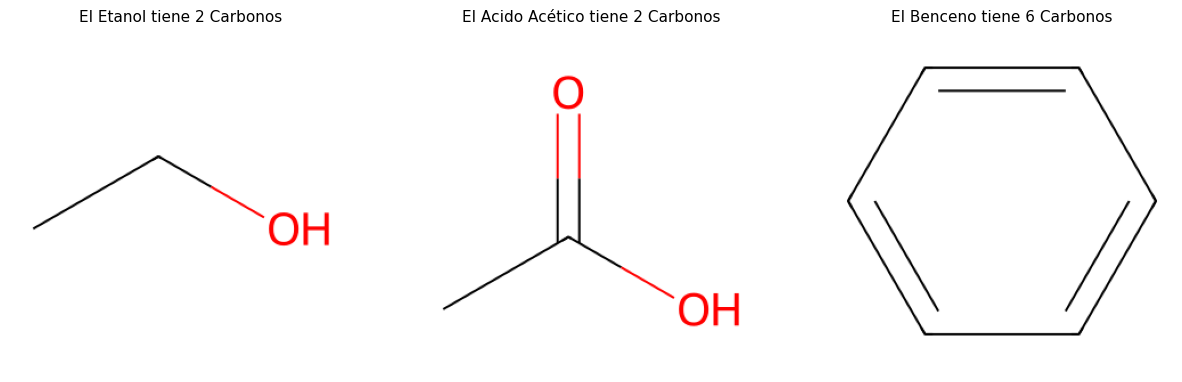

In [16]:
#Calcular N° de Carbonos
# Función para calcular el N° de Carbonos en nuestro DataFrame de Flavonoides:
def calcular_num_carbonos(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_carbonos = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'C'])
        return num_carbonos
    else:
        return None
#Función para conseguir imagen de moleculas
def plot_molecula(smile):
    mol = Chem.MolFromSmiles(smile)
    img = Draw.MolToImage(mol)
    return img
    
#TEST
# Moleculas conocidas para N° CARBONOS
EtanolSmile = "CCO"             # Etanol
AcidoAceticoSmile = "CC(=O)O"  # Ácido acético
BencenoSmile = "C1=CC=CC=C1"  # Benceno
#Usar Función para moleculas
Etanol = calcular_num_carbonos(EtanolSmile)
AcidoAcetico = calcular_num_carbonos(AcidoAceticoSmile)
Benceno = calcular_num_carbonos(BencenoSmile)
#Imagenes de  moleculas
img_Etanol=plot_molecula(EtanolSmile)
img_AcidoAcetico=plot_molecula(AcidoAceticoSmile)
img_Benceno=plot_molecula(BencenoSmile)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Calcular enlaces dobles Flavanona
axs[0].imshow(img_Etanol)
axs[0].set_title(f"El Etanol tiene {Etanol} Carbonos",fontsize=11)
axs[0].axis('off')
# Subplot 2 = Calcular enlaces dobles Flavanol
axs[1].imshow(img_AcidoAcetico)
axs[1].axis('off')
axs[1].set_title(f"El Acido Acético tiene {AcidoAcetico} Carbonos",fontsize=11)
#Subplot 3 = Calcular enlaces dobles Nitrisona
axs[2].imshow(img_Benceno)
axs[2].axis('off')
axs[2].set_title(f"El Benceno tiene {Benceno} Carbonos",fontsize=11)
plt.show()

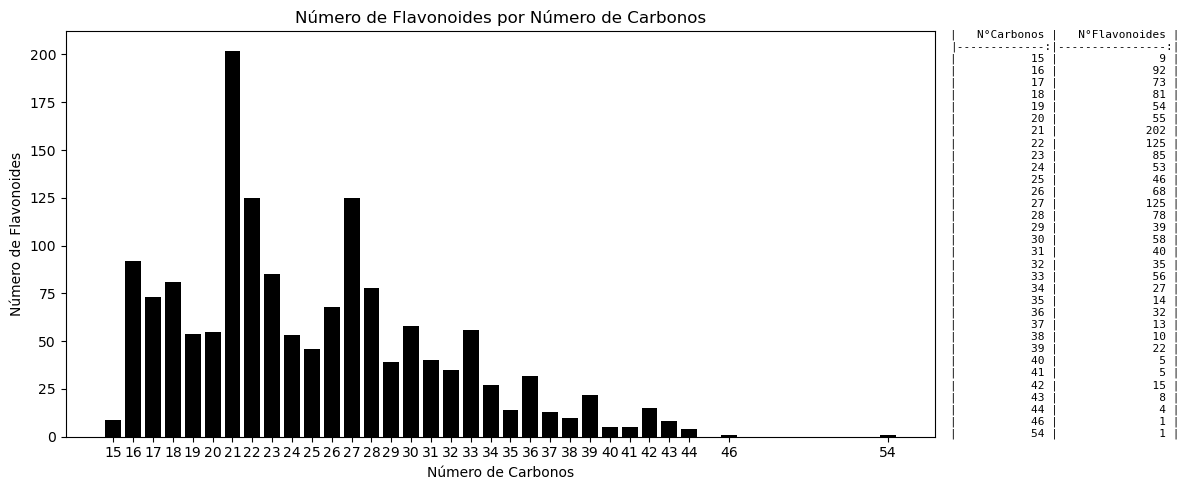

,ChEBI ID,ChEBI Name,SMILES,PubChem SID,N°Carbonos,N°S,N°N,Estructura_isoflavona,N°Oxigenos_DobleEnlace,N°Aromaticos,N°Oxigenos,Estructura_flavanol,Tipo_flavonoide,Estructura_flavanona,Estructura_flavanonol,Estructura_isoflavanona
0,177972,"3,4,5-trihydroxy-6-{[5,6,7-trihydroxy-2-(4-hyd...",O1C(OC2=C(OC3=C(C2=O)C(O)=C(O)C(O)=C3)C4=CC(OC...,SID: 85377015\nCID: 131835070,22,0,0,False,2,3,14,False,Otro,False,False,False
1,191634,Neoliquiritin 2''-apioside,O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...,SID: 85390422\nCID: 131752849,26,0,0,False,1,2,13,False,Flavanona,True,False,False
2,186794,Haploside F,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=C(O)C=3OC(=C...,SID: 85385648\nCID: 44260005,28,0,0,False,1,3,17,False,Otro,False,False,False
3,197154,Sagittatoside A,O([C@@H]1[C@H](O)[C@@H](O)[C@@H](O[C@H]1OC2=C(...,SID: 85395895\nCID: 13916054,33,0,0,False,1,3,15,False,Otro,False,False,False
4,188752,Diosmetin 7-O-beta-D-glucopyranoside,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1OC=2...,SID: 85387578\nCID: 11016019,22,0,0,False,1,3,11,False,Otro,False,False,False


In [41]:
# Añadir columna N°Carbonos al Df
df['N°Carbonos'] = df['SMILES'].apply(calcular_num_carbonos)
# Agrupar por el número de carbonos y contar el número de Flavonoides en cada grupo
grupos_por_carbonos = df.groupby('N°Carbonos').size()
# Convertir la Serie en un DataFrame
df_resultado_carbonos = grupos_por_carbonos.reset_index()
df_resultado_carbonos.columns = ["N°Carbonos", "N°Flavonoides"]
#Markdown
df_resultado_md = df_resultado_carbonos.to_markdown(index=False)

#Parametros de la cuadricula
fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[100, 1])  # Ancho relativo de los subplots
# Subplot 1 = Grafico Carbono
ax1 = fig.add_subplot(gs[0]) #Añadir subplot ax1 a primera cuadricula del plot
ax1.bar(df_resultado_carbonos['N°Carbonos'], df_resultado_carbonos['N°Flavonoides'], color='black', width=0.8) #Columnas del Df
ax1.set_xlabel('Número de Carbonos')
ax1.set_ylabel('Número de Flavonoides')
ax1.set_title('Número de Flavonoides por Número de Carbonos')
ax1.set_xticks(df_resultado_carbonos['N°Carbonos']) 
# Sub plot 2 = Markdown
ax2 = fig.add_subplot(gs[1])
ax2.text(0, 0.5, df_resultado_md, ha='left', va='center', fontsize=8, color='black', fontfamily='monospace')
ax2.axis('off')  # Desactivar ejes 
#Mostrar Plot 
plt.tight_layout()
plt.show()

df.head()

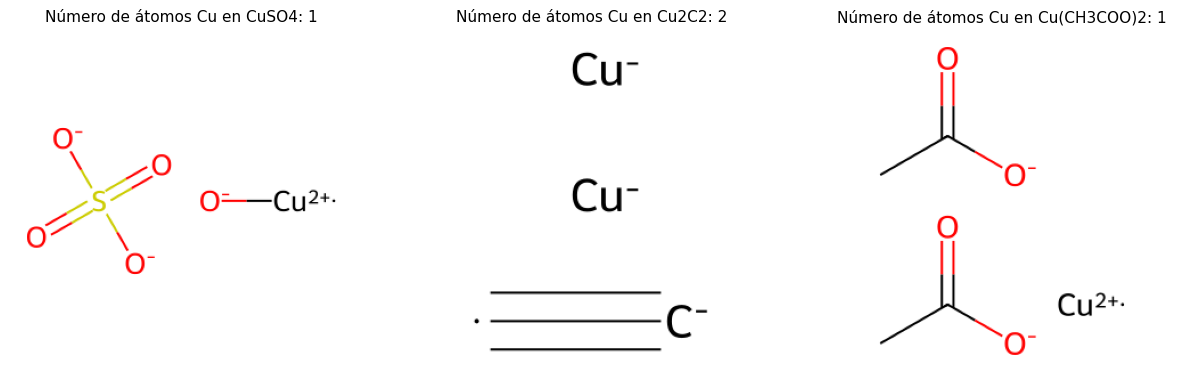

In [42]:
#Función para buscar Cu en moleculas.
def calcular_num_cobre(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_cobre = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'Cu'])
        return num_cobre
    else:
        return None
        
# Moleculas conocidas (Test)
SulfatodeCusmile = "S(=O)(=O)([O-])[O-].[O-][Cu+2]"  # CuSO4 (Sulfato de cobre)
Copperacetylidesmile = "[Cu-].[C-]#[C].[Cu-]"  # Cu2C2 (Cloruro de cobre)
AcetatodeCusmile = "CC(=O)[O-].CC(=O)[O-].[Cu+2]"  # Cu(CH3COO)2 (Acetato de cobre)
# Calcular el número de átomos de cobre Cu2+ para cada molécula
SulfatodeCu = calcular_num_cobre(SulfatodeCusmile)
Copperacetylide = calcular_num_cobre(Copperacetylidesmile)
AcetatodeCu = calcular_num_cobre(AcetatodeCusmile)
# Crear los objetos de molécula desde los SMILES
imagen_SulfatodeCu = plot_molecula(SulfatodeCusmile)
imagen_ClorurodeSmile = plot_molecula(Copperacetylidesmile)
imagen_AcetatodeCu = plot_molecula(AcetatodeCusmile)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Calcular enlaces dobles Flavanona
axs[0].imshow(imagen_SulfatodeCu)
axs[0].set_title(f"Número de átomos Cu en CuSO4: {SulfatodeCu}",fontsize=11)
axs[0].axis('off')
# Subplot 2 = Calcular enlaces dobles Flavanol
axs[1].imshow(imagen_ClorurodeSmile)
axs[1].axis('off')
axs[1].set_title(f"Número de átomos Cu en Cu2C2: {Copperacetylide}",fontsize=11)
#Subplot 3 = Calcular enlaces dobles Nitrisona
axs[2].imshow(imagen_AcetatodeCu)
axs[2].axis('off')
axs[2].set_title(f"Número de átomos Cu en Cu(CH3COO)2: {AcetatodeCu}",fontsize=11)
plt.show()

In [43]:
# Calcular el número de Cu en la columna SMILES
df['N°Cu'] = df['SMILES'].apply(calcular_num_cobre)

# Generar DataFrame agrupado por Cu "Groupby"
grupos_por_cobre = df.groupby('N°Cu').size().reset_index()
grupos_por_cobre.columns = ["N°Cu", "N° Flavonoides"]

# Imprimir resultados
print("Resultados:")
print(grupos_por_cobre)
print("\n___________________________")
print("Df")
print("___________________________")
# Imprimir la columna 'N°Cu' del df con su header
print(df['N°Cu'].to_frame())

Resultados:
   N°Cu  N° Flavonoides
0     0            1531

___________________________
Df
___________________________
      N°Cu
0        0
1        0
2        0
3        0
4        0
...    ...
1526     0
1527     0
1528     0
1529     0
1530     0

[1531 rows x 1 columns]


In [44]:

#Bajo la misma lógica comprobamos si hay Fe en nuestro Dataframe
def calcular_num_fierro(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_fierro = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'Fe'])
        return num_fierro
    else:
        return None

# Aplicar la función a la columna SMILES 
df['N°Fe'] = df['SMILES'].apply(calcular_num_fierro)

# Generar DataFrame agrupado por Fe  "Groupby"
grupos_por_fierro = df.groupby('N°Fe').size().reset_index()
grupos_por_fierro.columns = ["N°Fe", "N°Flavonoides"]

# Imprimir resultados
print("Resultados:")
print(grupos_por_fierro)
print("___________________________")
print("Df")
print("___________________________")
# Imprimir la columna 'N°Fe' del df con su header
print(df['N°Fe'].to_frame().sample(n=10))

Resultados:
   N°Fe  N°Flavonoides
0     0           1531
___________________________
Df
___________________________
      N°Fe
1034     0
119      0
1344     0
448      0
516      0
1117     0
52       0
1256     0
1147     0
671      0


In [45]:
#Bajo la misma lógica comprobamos si hay S en nuestro Dataframe
def calcular_num_S(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_S = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'S'])
        return num_S
    else:
        return None

# Aplicar la función a la columna SMILES 
df['N°S'] = df['SMILES'].apply(calcular_num_S)
# Generar DataFrame agrupado por Fe  "Groupby"
grupos_por_S = df.groupby('N°S').size().reset_index()
grupos_por_S.columns = ["N°S", "N°Flavonoides"]

# Imprimir resultados
print("Resultados:")
print(grupos_por_S)
print("___________________________")
print("Df")
print("___________________________")
# Imprimir la columna 'N°S' del df con su header
print(df['N°S'].to_frame().sample(n=10))

Resultados:
   N°S  N°Flavonoides
0    0           1459
1    1             66
2    2              6
___________________________
Df
___________________________
      N°S
400     0
962     0
567     0
278     0
548     0
1036    0
213     0
362     0
973     0
322     0


In [46]:
#Bajo la misma lógica comprobamos si hay N en nuestro Dataframe
def calcular_num_N(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_N = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'N'])
        return num_N
    else:
        return None

# Calcular el número de Cu en la columna SMILES
df['N°N'] = df['SMILES'].apply(calcular_num_N)

# Generar DataFrame agrupado por Cu "Groupby"
grupos_por_N = df.groupby('N°N').size().reset_index()
grupos_por_N.columns = ["N°N", "N° Flavonoides"]

# Imprimir resultados
print("Resultados:")
print(grupos_por_N)
print("___________________________")
print("Df")
print("___________________________")
# Imprimir la columna 'N°N' del df con su header
print(df['N°N'].to_frame().sample(n=10))

Resultados:
   N°N  N° Flavonoides
0    0            1518
1    1              12
2    3               1
___________________________
Df
___________________________
      N°N
526     0
671     0
1357    0
635     0
200     0
810     0
1031    0
517     0
445     0
1234    0


In [47]:
#Algunas columnas que generamos no nos entregan información util, será mejor borrarlas:
df = df.drop("N°Fe", axis=1)
df = df.drop("N°Cu", axis=1)
df.head()

,ChEBI ID,ChEBI Name,SMILES,PubChem SID,N°Carbonos,N°S,N°N,Estructura_isoflavona,N°Oxigenos_DobleEnlace,N°Aromaticos,N°Oxigenos,Estructura_flavanol,Tipo_flavonoide,Estructura_flavanona,Estructura_flavanonol,Estructura_isoflavanona
0,177972,"3,4,5-trihydroxy-6-{[5,6,7-trihydroxy-2-(4-hyd...",O1C(OC2=C(OC3=C(C2=O)C(O)=C(O)C(O)=C3)C4=CC(OC...,SID: 85377015\nCID: 131835070,22,0,0,False,2,3,14,False,Otro,False,False,False
1,191634,Neoliquiritin 2''-apioside,O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...,SID: 85390422\nCID: 131752849,26,0,0,False,1,2,13,False,Flavanona,True,False,False
2,186794,Haploside F,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=C(O)C=3OC(=C...,SID: 85385648\nCID: 44260005,28,0,0,False,1,3,17,False,Otro,False,False,False
3,197154,Sagittatoside A,O([C@@H]1[C@H](O)[C@@H](O)[C@@H](O[C@H]1OC2=C(...,SID: 85395895\nCID: 13916054,33,0,0,False,1,3,15,False,Otro,False,False,False
4,188752,Diosmetin 7-O-beta-D-glucopyranoside,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1OC=2...,SID: 85387578\nCID: 11016019,22,0,0,False,1,3,11,False,Otro,False,False,False


Número de anillos en naftaleno (C1=CC=C2C=CC=CC2=C1): 2


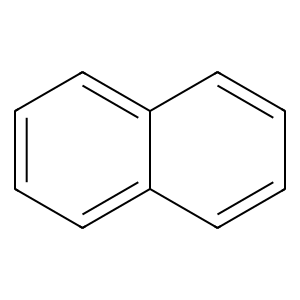

In [48]:
#Ya que sabemos que los flavonoides tienen anillos en su composición podemos contarlos y subclasificarlos de acuerdo a este criterio:
#Mediante la función GetSymmSSSR

#GetSymmSSSR es un método de la biblioteca RDKit que se utiliza para calcular los anillos simétricos más pequeños que rodean a los átomos 
#de una molécula. SSSR significa "Smallest Set of Smallest Rings."
def mostrar_molecula (smile):
    mol = Chem.MolFromSmiles(smile)
    img = Draw.MolToImage(mol)
    display(img)   

def contar_anillos(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_anillos = len(Chem.GetSymmSSSR(mol))  # Obtener el número de sistemas de anillos(SSSR)
        return num_anillos
    else:
        return "Error al procesar la molécula"
        
# Test
naftaleno_smiles = "C1=CC=C2C=CC=CC2=C1"  # Naftaleno
# Aplicar la función para contar anillos en el naftaleno
num_anillos_naftaleno = contar_anillos(naftaleno_smiles)
# Mostrar el resultado
print(f"Número de anillos en naftaleno ({naftaleno_smiles}): {num_anillos_naftaleno}")
mostrar_molecula(naftaleno_smiles)

In [49]:
# Aplicar la función a la columna SMILES para contar anillos  y crear una nueva columna en el DataFrame
df['N°Anillos'] = df['SMILES'].apply(contar_anillos)
# Mostrar el DataFrame con la nueva columna de número de anillos 
df.head()

,ChEBI ID,ChEBI Name,SMILES,PubChem SID,N°Carbonos,N°S,N°N,Estructura_isoflavona,N°Oxigenos_DobleEnlace,N°Aromaticos,N°Oxigenos,Estructura_flavanol,Tipo_flavonoide,Estructura_flavanona,Estructura_flavanonol,Estructura_isoflavanona,N°Anillos
0,177972,"3,4,5-trihydroxy-6-{[5,6,7-trihydroxy-2-(4-hyd...",O1C(OC2=C(OC3=C(C2=O)C(O)=C(O)C(O)=C3)C4=CC(OC...,SID: 85377015\nCID: 131835070,22,0,0,False,2,3,14,False,Otro,False,False,False,4
1,191634,Neoliquiritin 2''-apioside,O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...,SID: 85390422\nCID: 131752849,26,0,0,False,1,2,13,False,Flavanona,True,False,False,5
2,186794,Haploside F,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=C(O)C=3OC(=C...,SID: 85385648\nCID: 44260005,28,0,0,False,1,3,17,False,Otro,False,False,False,5
3,197154,Sagittatoside A,O([C@@H]1[C@H](O)[C@@H](O)[C@@H](O[C@H]1OC2=C(...,SID: 85395895\nCID: 13916054,33,0,0,False,1,3,15,False,Otro,False,False,False,5
4,188752,Diosmetin 7-O-beta-D-glucopyranoside,O1[C@@H]([C@@H](O)[C@H](O)[C@@H](O)[C@@H]1OC=2...,SID: 85387578\nCID: 11016019,22,0,0,False,1,3,11,False,Otro,False,False,False,4


In [21]:
# Generar DataFrame agrupado por N° de Anillos "Groupby" 
grupos_por_anillos = df.groupby('N°Anillos').size()

# Graficar Df Anillos
plt.figure(figsize=(10, 2))
plt.bar(grupos_por_anillos.index, grupos_por_anillos.values, color='khaki')
plt.xlabel('Número de Anillos')
plt.ylabel('Número de Flavonoides')
plt.title('Número de Flavonoides por Número de Anillos')
plt.xticks(grupos_por_anillos.index) #Generar etiqueta en eje X solo si hay resultados
plt.grid(False)
plt.show()

# Graficar en escala logaritmica
plt.figure(figsize=(10, 2))
plt.bar(grupos_por_anillos.index, grupos_por_anillos.values, color='khaki')
plt.xlabel('Número de Anillos')
plt.ylabel('Número de Flavonoides')
plt.title('Número de Flavonoides por Número de Anillos log')
plt.xticks(grupos_por_anillos.index)
plt.grid(True)
plt.yscale('log')
plt.show()

KeyError: 'N°Anillos'

In [ ]:
# Transformamos la columna de interes a array para visualizar de otra manera y obtener el índice
num_anillos_array = df['N°Anillos'].to_numpy()
# Obtener el índice del valor 10 en el array de la columna 'N°Anillos'
indice_molecula_10 = np.where(num_anillos_array == 10)[0]
#Encontrar índice
smiles_flavonoide_10 = df.loc[indice_molecula_10]['SMILES'].values[0]
# Crear un objeto Mol desde el SMILES y mostrar
mol = Chem.MolFromSmiles(smiles_flavonoide_10)
imagen_flavonoide_10 = plot_molecula(smiles_flavonoide_10)

# Buscar el nombre de Flavonoide con indice 90
print(df.iloc[90, 1])

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Visualizar los datos en el array en el primer subplot (a la izquierda)
ax1.plot(num_anillos_array, marker='o', color='black')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Número de Anillos')
ax1.set_title('Visualización de Datos de Anillos')
ax1.grid(True)
# Marcar en rojo el índice 10 en el gráfico
ax1.plot(indice_molecula_10, num_anillos_array[indice_molecula_10], marker='o', color='red', markersize=10)
#Subplot 2 = Molecula 10 anillos
ax2.imshow(imagen_flavonoide_10)
ax2.axis('off')  # Desactivar ejes en el segundo subplot
#Mostrar Plot
plt.show()

In [ ]:
#Podemos conmprobarlo con algun otro índice, en este caso el del dato atipico con 8 anillos
# Obtener el índice del valor 8 en el array de la columna 'N°Anillos'
indice_molecula_8 = np.where(num_anillos_array == 8)[0]
# Obtener el SMILES de la molécula con índice 1419
smiles_flavonoide_8 = df.loc[indice_molecula_8]['SMILES'].values[0]
# Crear un objeto Mol desde el SMILES de la molécula
mol = Chem.MolFromSmiles(smiles_flavonoide_8)
#Nombre Flavonoide indice 1419, 8 anillos.
print(df.iloc[1419, 1])

#Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#Subplot 1 =  Outlier 8 anillos
ax1.plot(num_anillos_array, marker='o', color='black')
ax1.plot(indice_molecula_8, num_anillos_array[indice_molecula_8], marker='o', color='red', markersize=10)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Número de Anillos')
ax1.grid(True)
#Subplot 2 = Imagen Outlier
imagen_molecula_8 = plot_molecula(smiles_flavonoide_8)
ax2.imshow(imagen_molecula_8)
ax2.set_title(f"Molecula de 8 anillos con índice #{indice_molecula_8}", fontsize=10)
ax2.axis('off')
# Ajustar el espacio entre los subplots horizontalmente y verticalmente
plt.subplots_adjust(wspace=100)  # Cambia el valor según tus necesidades
#Mostrar Plot
plt.tight_layout()
plt.show()

In [22]:
# Función para contar los anillos aromáticos en una molécula
def contar_aromaticos(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Error al procesar la molécula"
    ring_info = mol.GetRingInfo()
    atom_rings = ring_info.AtomRings()
    bond_rings = ring_info.BondRings()
    anillos_aromaticos = 0
    for bond_ring in bond_rings:
        aromatico = True
        for bond_idx in bond_ring:
            if not mol.GetBondWithIdx(bond_idx).GetIsAromatic():
                aromatico = False
                break
        if aromatico:
            anillos_aromaticos += 1
    return anillos_aromaticos
    
#Moleculas Test Anillo Aromático
#----------------------------------------Ciclohexano
Ciclohexanosmile = 'C1CCCCC1'  # Ejemplo de ciclohexano
imagenciclohexano = plot_molecula(Ciclohexanosmile)
#Contar anillos
anillos_ciclohexano = contar_anillos(Ciclohexanosmile)
#Contar anillos aromáticos
aromaticos_ciclohexano = contar_aromaticos(Ciclohexanosmile)
#----------------------------------------Flavonol
Flavonolsmile = "C1C(C(OC2=CC=CC=C21)C3=CC=CC=C3)O"
imagenflavonol = plot_molecula(Flavonolsmile)
#Contar anillos
anillos_flavonol = contar_anillos(Flavonolsmile)
#Contar anillos aromáticos
aromaticos_flavonol = contar_aromaticos(Flavonolsmile)
#----------------------------------------Antraceno
Antracenosmile = "C1=CC2=CC3=CC=CC=C3C=C2C=C1"
imagenantraceno = plot_molecula(Antracenosmile)
#Contar anillos
anillos_antraceno = contar_anillos(Antracenosmile)
#Contar anillos aromáticos
aromaticos_antraceno = contar_aromaticos(Antracenosmile)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Calcular enlaces dobles Flavanona
axs[0].imshow(imagenciclohexano)
axs[0].set_title(f"Número de anillos Ciclohexano: {anillos_ciclohexano}\nNúmero de anillos aromáticos Ciclohexano: {aromaticos_ciclohexano}", fontsize=11)
axs[0].axis('off')
# Subplot 2 = Calcular enlaces dobles Flavanol
axs[1].imshow(imagenflavonol)
axs[1].axis('off')
axs[1].set_title(f"Número de anillos Flavonol: {anillos_flavonol}\nNúmero de anillos aromáticos Flavonol: {aromaticos_flavonol}",fontsize=11)
#Subplot 3 = Calcular enlaces dobles Nitrisona
axs[2].imshow(imagenantraceno)
axs[2].axis('off')
axs[2].set_title(f"Número de anillos Antraceno: {anillos_antraceno}\nNúmero de anillos aromáticos Antraceno: {aromaticos_antraceno}",fontsize=11)
#Mostrar Plot
plt.show()

NameError: name 'contar_anillos' is not defined

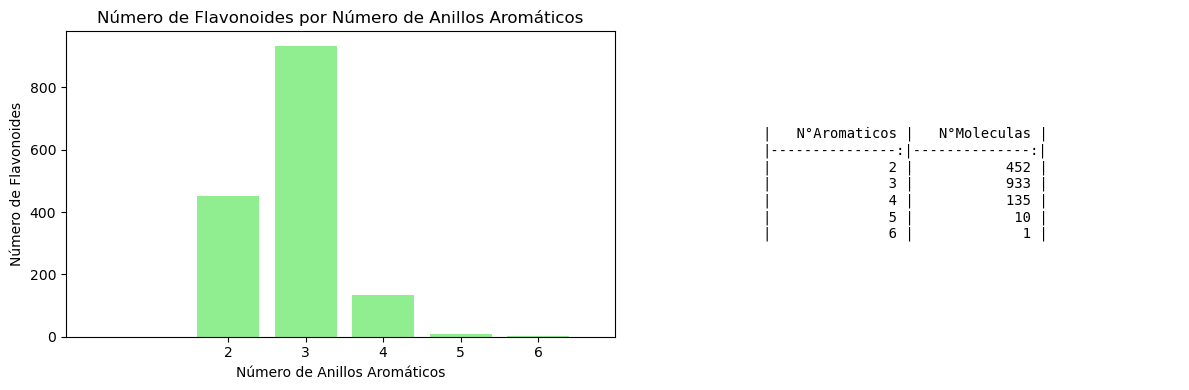

In [23]:
# Aplicar la función a la columna SMILES para contar el número de anillos aromáticos
df['N°Aromaticos'] = df['SMILES'].apply(contar_aromaticos)

# Agrupar por el número de anillos aromáticos y contar el número de moléculas en cada grupo
grupos_por_aromaticos = df.groupby('N°Aromaticos').size()

# Convertir la Serie en un DataFrame
df_resultado_aromatico = grupos_por_aromaticos.reset_index()
df_resultado_aromatico.columns = ["N°Aromaticos", "N°Moleculas"]
# Convertir el DataFrame a formato Markdown
df_resultado_md = df_resultado_aromatico.to_markdown(index=False)

# Graficar los datos de número de anillos aromáticos vs número de moléculas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Graficar el gráfico
ax1.bar(df_resultado_aromatico['N°Aromaticos'], df_resultado_aromatico['N°Moleculas'], color='lightgreen')
ax1.set_xlabel('Número de Anillos Aromáticos')
ax1.set_ylabel('Número de Flavonoides')
ax1.set_title('Número de Flavonoides por Número de Anillos Aromáticos')
ax1.set_xticks(df_resultado_aromatico['N°Aromaticos'])
ax1.grid(False)  # Desactivar las cuadrículas en el gráfico
ax1.set_xlim(-0.1, len(df_resultado_aromatico) + 2)
# Mostrar el texto de resultados al lado del gráfico
ax2.axis('off')  # Desactivar ejes en el segundo subplot
ax2.text(0.5, 0.5, df_resultado_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Agrandar el eje x en el gráfico de barras
plt.tight_layout()
plt.show()

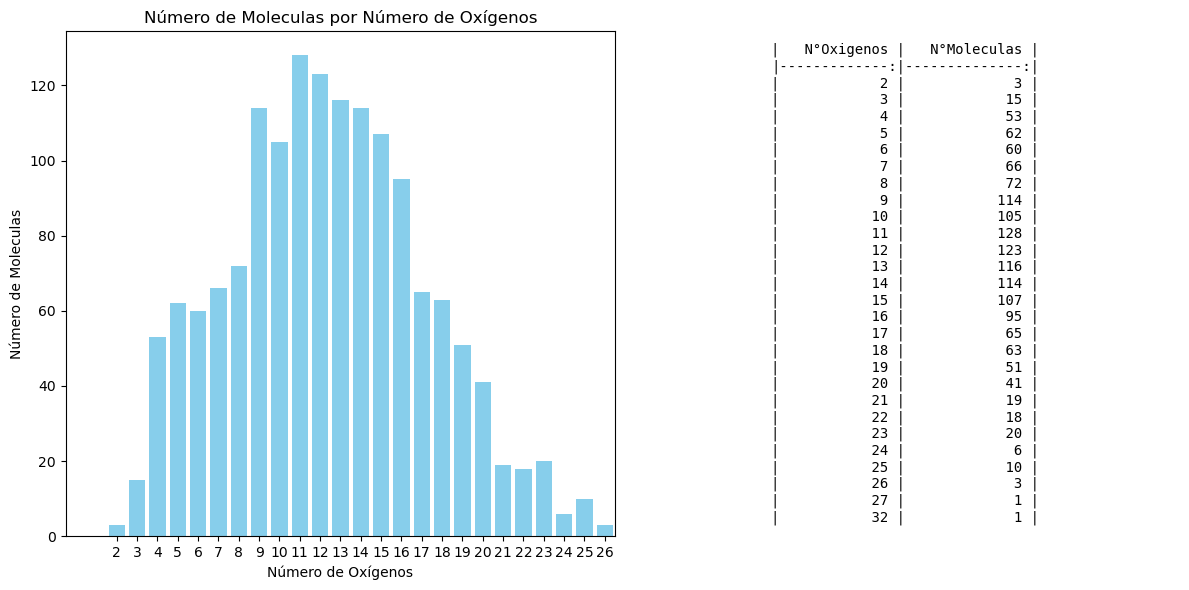

In [24]:
# Función para calcular el N° de Oxígenos en una molécula dada por SMILES
def calcular_num_oxigenos(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_oxigenos = len([atom.GetSymbol() for atom in mol.GetAtoms() if atom.GetSymbol() == 'O'])
        return num_oxigenos
    else:
        return None
# Aplicar la función a la columna SMILES para calcular el número de oxígenos
df['N°Oxigenos'] = df['SMILES'].apply(calcular_num_oxigenos)

# Agrupar por el número de oxígenos y contar el número de Flavonoides en cada grupo
grupos_por_oxigenos = df.groupby('N°Oxigenos').size()

# Convertir la Serie en un DataFrame
df_resultado_oxigeno = grupos_por_oxigenos.reset_index()
df_resultado_oxigeno.columns = ["N°Oxigenos", "N°Moleculas"]

# Convertir el DataFrame a formato Markdown
df_resultado_md = df_resultado_oxigeno.to_markdown(index=False)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Subplot 1 = Gráfico
ax1.bar(df_resultado_oxigeno['N°Oxigenos'], df_resultado_oxigeno['N°Moleculas'], color='skyblue')
ax1.set_xlabel('Número de Oxígenos')
ax1.set_ylabel('Número de Moleculas')
ax1.set_title('Número de Moleculas por Número de Oxígenos')
ax1.set_xticks(df_resultado_oxigeno['N°Oxigenos'])
ax1.grid(False)  # Desactivar las cuadrículas en el gráfico
# Subplot 2 = Markdown
ax2.axis('off')  # Desactivar ejes en el segundo subplot
ax2.text(0.5, 0.5, df_resultado_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Agrandar el eje x en el gráfico de barras
ax1.set_xlim(-0.5, len(df_resultado_oxigeno) - 0.5)
#Mostrar Plot
plt.tight_layout()
plt.show()

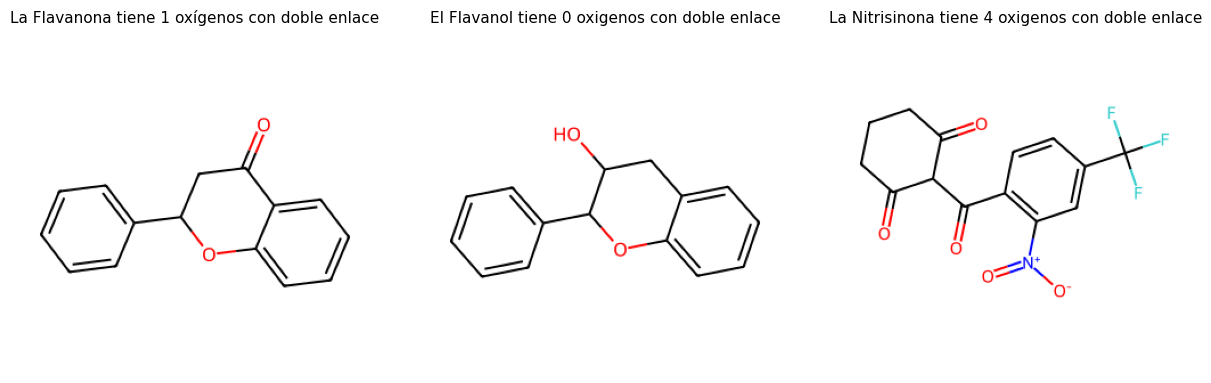

In [25]:
#Tenemos los oxigenos totales, ahora vamos a calcular cuantos de estos oxigenos estan unidos con doble enlace.
def calcular_num_oxigenos_con_doble_enlace(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_oxigenos_doble_enlace = 0
        for bond in mol.GetBonds():
            if bond.GetBondType() == Chem.BondType.DOUBLE:
                atom1 = bond.GetBeginAtom()
                atom2 = bond.GetEndAtom()
                if atom1.GetSymbol() == 'O':
                    num_oxigenos_doble_enlace += 1
                elif atom2.GetSymbol() == 'O':
                    num_oxigenos_doble_enlace += 1
        return num_oxigenos_doble_enlace
    else:
        return None
#----------------------------------------Flavanona
Flavanonasmile = "C1C(OC2=CC=CC=C2C1=O)C3=CC=CC=C3"
enlacedobleflavanona = calcular_num_oxigenos_con_doble_enlace(Flavanonasmile)
imagen1= plot_molecula(Flavanonasmile)
#----------------------------------------Flavonol
Flavonolsmile = "C1C(C(OC2=CC=CC=C21)C3=CC=CC=C3)O"
enlacedobleflavonol = calcular_num_oxigenos_con_doble_enlace(Flavonolsmile)
imagen2= plot_molecula(Flavonolsmile)
#----------------------------------------Nitrisinona
Nitrisinonasmile = "C1CC(=O)C(C(=O)C1)C(=O)C2=C(C=C(C=C2)C(F)(F)F)[N+](=O)[O-]"
enlacedoblenitrisinona = calcular_num_oxigenos_con_doble_enlace(Nitrisinonasmile)
imagen3= plot_molecula(Nitrisinonasmile)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Calcular enlaces dobles Flavanona
axs[0].imshow(imagen1)
axs[0].set_title(f"La Flavanona tiene {enlacedobleflavanona} oxígenos con doble enlace",fontsize=11)
axs[0].axis('off')
# Subplot 2 = Calcular enlaces dobles Flavanol
axs[1].imshow(imagen2)
axs[1].axis('off')
axs[1].set_title(f"El Flavanol tiene {enlacedobleflavonol} oxigenos con doble enlace",fontsize=11)
#Subplot 3 = Calcular enlaces dobles Nitrisona
axs[2].imshow(imagen3)
axs[2].axis('off')
axs[2].set_title(f"La Nitrisinona tiene {enlacedoblenitrisinona} oxigenos con doble enlace",fontsize=11)
#Mostrar Plot
plt.show()

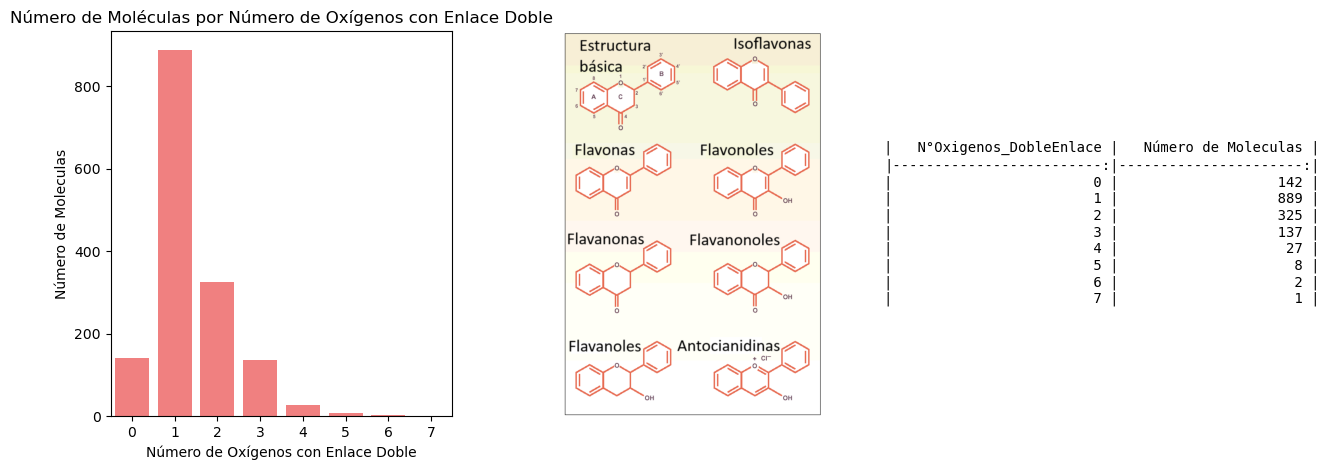

In [26]:
from PIL import Image
# Calcular el número de oxígenos con enlace doble y contar el número de moléculas en cada grupo
df['N°Oxigenos_DobleEnlace'] = df['SMILES'].str.count('=O')
grupos_por_oxigenos_doble_enlace = df.groupby('N°Oxigenos_DobleEnlace').size()
df_resultado_md = grupos_por_oxigenos_doble_enlace.reset_index(name="Número de Moleculas").to_markdown(index=False)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Graficar N°O con doble enlace
axs[0].bar(grupos_por_oxigenos_doble_enlace.index, grupos_por_oxigenos_doble_enlace.values, color='lightcoral')
axs[0].set(xlabel='Número de Oxígenos con Enlace Doble', ylabel='Número de Moleculas',
           title='Número de Moléculas por Número de Oxígenos con Enlace Doble', xticks=grupos_por_oxigenos_doble_enlace.index)
axs[0].grid(False)
axs[0].set_xlim(-0.5, len(grupos_por_oxigenos_doble_enlace) - 0.5)
# Subplot 2 = Cargar y mostrar la imagen de flavonoides
ruta_imagen = "imgs/flavsimg.png"
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
axs[1].axis('off')
#Subplot 3 = Mostrar Markdown
axs[2].axis('off')
axs[2].text(0.5, 0.5, df_resultado_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
#Mostrar Plot
plt.show()

Índices de moléculas con 0 enlaces dobles en oxígeno: [44, 47, 57, 60, 70, 86, 110, 129, 138, 150, 164, 177, 179, 181, 198, 200, 214, 239, 241, 269, 273, 276, 279, 288, 326, 330, 337, 343, 350, 371, 416, 424, 452, 457, 458, 465, 467, 468, 473, 475, 496, 513, 515, 519, 539, 551, 558, 579, 584, 623, 629, 635, 638, 679, 693, 695, 704, 709, 710, 723, 727, 746, 759, 762, 767, 776, 806, 816, 820, 822, 823, 833, 837, 841, 847, 848, 869, 883, 884, 891, 901, 904, 913, 915, 917, 924, 928, 942, 954, 958, 980, 983, 1011, 1016, 1022, 1056, 1085, 1089, 1091, 1098, 1099, 1106, 1113, 1126, 1155, 1167, 1172, 1175, 1181, 1189, 1214, 1216, 1224, 1228, 1236, 1237, 1240, 1244, 1245, 1246, 1255, 1261, 1263, 1284, 1293, 1296, 1297, 1303, 1306, 1341, 1372, 1376, 1383, 1397, 1433, 1462, 1466, 1469, 1478, 1496, 1497, 1512]


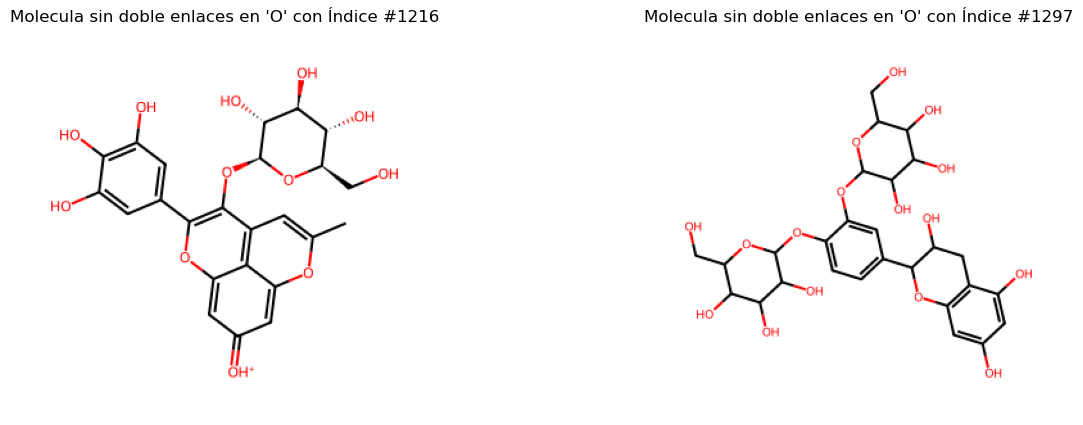

In [27]:
import random
# Encontrar los índices de las moléculas que tienen 0 enlaces dobles en oxígeno
indices_cero_enlaces_dobles = df[df['N°Oxigenos_DobleEnlace'] == 0].index.tolist()
print("Índices de moléculas con 0 enlaces dobles en oxígeno:", indices_cero_enlaces_dobles)

indice_molecula_0enlaces_1 = random.choice(indices_cero_enlaces_dobles)
smiles_molecula_0enlaces_1 = df.loc[indice_molecula_0enlaces_1, 'SMILES']
imagen1 = plot_molecula(smiles_molecula_0enlaces_1)

indice_molecula_0enlaces_2 = random.choice(indices_cero_enlaces_dobles)
smiles_molecula_0enlaces_2 = df.loc[indice_molecula_0enlaces_2, 'SMILES']
imagen2=plot_molecula(smiles_molecula_0enlaces_2)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
# Subplot 1 = Test 1
axs[0].set_title(f"Molecula sin doble enlaces en 'O' con Índice #{indice_molecula_0enlaces_1}")  # Título para la imagen 1
axs[0].imshow(imagen1);
# Subplot 2 = Test 2
axs[1].set_title(f"Molecula sin doble enlaces en 'O' con Índice #{indice_molecula_0enlaces_2}")  # Título para la imagen 2
axs[1].imshow(imagen2);
plt.show()

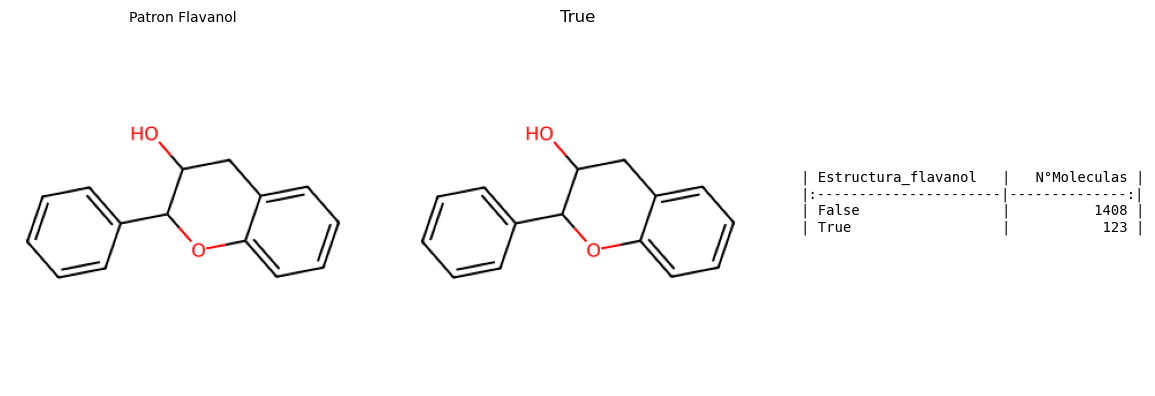

In [28]:
# Función para verificar si una molécula contiene la estructura del flavanol
def verificar_flavanol(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_flavanol)
    else:
        return False  
# Lista de moléculas
moleculas = [
    "O1C(C(O)C(O)C(O)C1CO)C2=C3OC(C(O)CC3=C(O)C(O)=C2O)C4=CC(O)=CC=C4",
    "C1C(OC2=CC=CC=C2C1=O)C3=CC=CC=C3",
    "C1=CC2=CC3=CC=CC=C3C=C2C=C1",
    "C1C(C(OC2=CC=CC=C21)C3=CC=CC=C3)O"
]

# Patrón Flavanol
smiles_flavanol =("C1C(C(OC2=CC=CC=C21)C3=CC=CC=C3)O")
imagen_flavanol = plot_molecula(smiles_flavanol)
patron_flavanol = Chem.MolFromSmiles(smiles_flavanol)
# Seleccionar una molécula aleatoria
smiles_molecula_aleatoria = random.choice(moleculas)
imagen_molecula = plot_molecula(smiles_molecula_aleatoria)
es_flavanol = verificar_flavanol(smiles_molecula_aleatoria)       
# Aplicar la función a la columna SMILES para verificar si es o no Flavonol
df['Estructura_flavanol'] = df['SMILES'].apply(verificar_flavanol)
grupo_flavanol = df.groupby('Estructura_flavanol').size()
grupo_flavanol_md = grupo_flavanol.reset_index(name="N°Moleculas").to_markdown(index=False)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Ajusta el tamaño de la figura
# Subplot 1 = Patron Flavanol
ax1 = axs[0]
ax1.imshow(imagen_flavanol)  
ax1.set_title("Patron Flavanol", fontsize=10)
#Subplot 2 = Test +
ax2 = axs[1]
ax2.imshow(imagen_molecula)
ax2.set_title(es_flavanol, fontsize=12)
#Subplot 3 = Markdown
ax3 = axs[2]
ax3.text(0.5, 0.5, grupo_flavanol_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
#Mostrar Plot
plt.tight_layout()
plt.show()

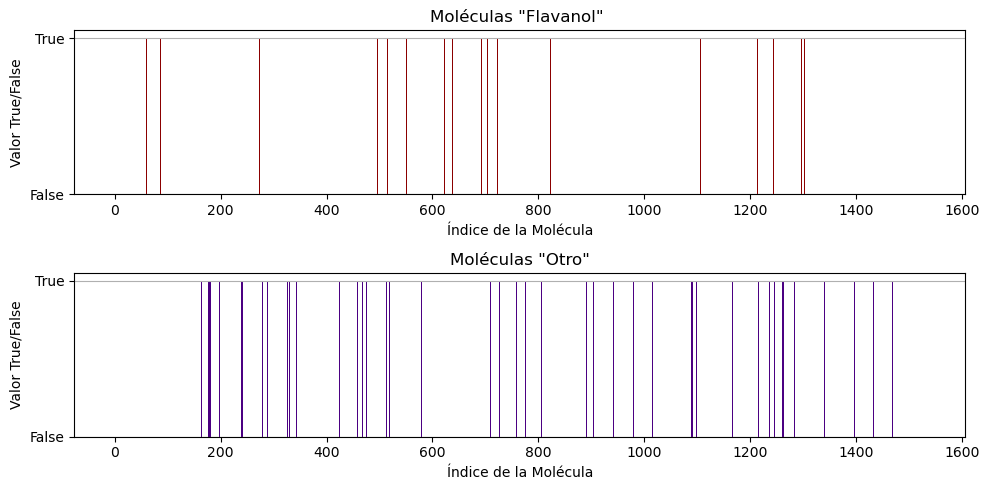

In [29]:
#Crear columna vacía Tipo_flavonoide
df["Tipo_flavonoide"] = ""

# Filtrar las filas con índices en `indices_cero_enlaces_dobles` y donde 'Estructura_flavanol' sea True
df.loc[(df['Estructura_flavanol'] == True), 'Tipo_flavonoide'] = 'Flavanol'
# Filtrar las filas con índices en `indices_cero_enlaces_dobles` y donde 'Estructura_flavanol' sea False
df.loc[(df['Estructura_flavanol'] == False), 'Tipo_flavonoide'] = 'Otro'
# Filtrar el DataFrame para obtener los índices de Flavanol y Otro
indices_flavanol = df[(df['Tipo_flavonoide'] == 'Flavanol') & (df.index.isin(indices_cero_enlaces_dobles))].index
indices_otro = df[(df['Tipo_flavonoide'] == 'Otro') & (df.index.isin(indices_cero_enlaces_dobles))].index
# Crear un array para representar True y False para Flavanol y Otro
valores_flavanol = [True if indice in indices_flavanol else False for indice in df.index]
valores_otro = [True if indice in indices_otro else False for indice in df.index]

# Plot
plt.figure(figsize=(10, 5))
# Subplot 1 : Valores para "Flavanol"
plt.subplot(2, 1, 1)
plt.bar(df.index, valores_flavanol, color=['darkred' if v else 'red' for v in valores_flavanol])
plt.title('Moléculas "Flavanol" ')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')
# Subplot 2 : Valores "Otro"
plt.subplot(2, 1, 2)
plt.bar(df.index, valores_otro, color=['indigo' if v else 'red' for v in valores_otro])
plt.title('Moléculas "Otro"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')
#Mostrar Plot
plt.tight_layout()
plt.show()

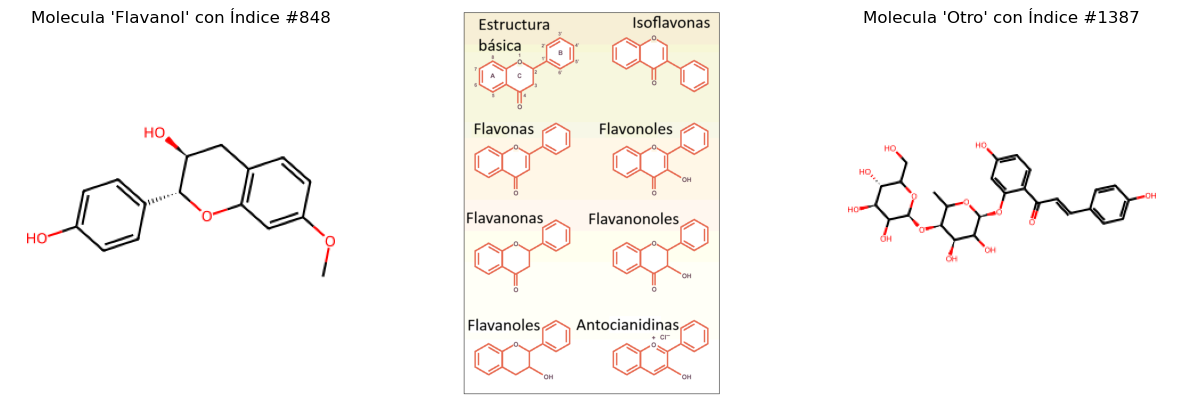

In [30]:
#Molecula Flavanol
df_flavanol = df[df['Tipo_flavonoide'] == 'Flavanol']
indice_molecula_flavanol = random.choice(df_flavanol.index)#Obtener índice random
# Obtener el SMILES de la molécula en el índice dado
smiles_molecula_flavanol = df.loc[indice_molecula_flavanol, 'SMILES']
plot_molecula(smiles_molecula_flavanol)

#Molecula "Otro"
df_otro = df[df['Tipo_flavonoide'] == 'Otro']
indice_molecula_otro = random.choice(df_otro.index) #Obtener índice random
# Obtener el SMILES de la molécula en el índice dado
smiles_molecula_otro = df.loc[indice_molecula_otro, 'SMILES']
plot_molecula(smiles_molecula_otro)

#Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
#Subplot 1 = "Flavanol"
axs[0].set_title(f"Molecula 'Flavanol' con Índice #{indice_molecula_flavanol}")  # Título para la imagen 1
imagen_molecula_flavanol = plot_molecula(smiles_molecula_flavanol)
axs[0].imshow(imagen_molecula_flavanol)
#Subplot 2 = "Estructuras flavonoides"
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
# Subplot 3 : "Otro"
axs[2].set_title(f"Molecula 'Otro' con Índice #{indice_molecula_otro}")  # Título para la imagen 3
imagen_molecula_otro = plot_molecula(smiles_molecula_otro)
axs[2].imshow(imagen_molecula_otro)
# Mostrar el gráfico
plt.show()

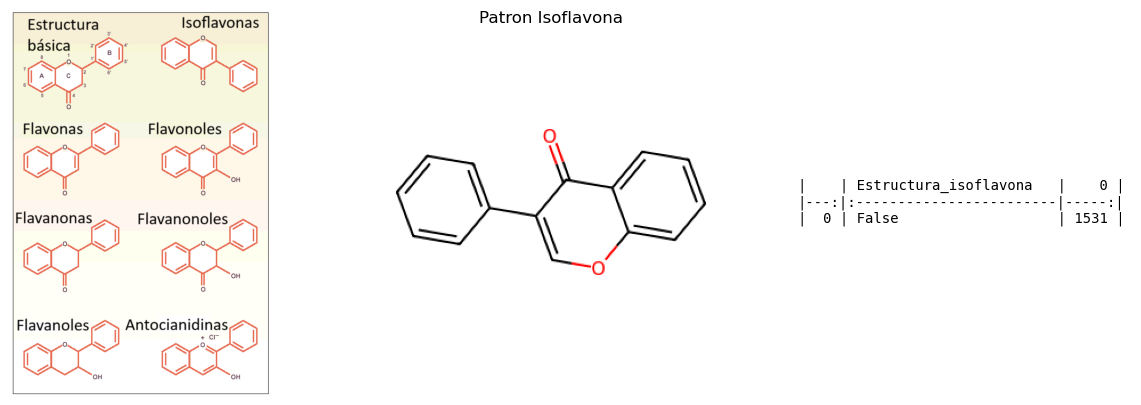

In [31]:
# Función para verificar si una molécula contiene la estructura de la isoflavona
def verificar_isoflavona(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_isoflavona)
    else:
        return False  # Si la molécula no se puede convertir, asumimos que no contiene el isoflavona

#Buscar Isoflavonas
smiles_isoflavona = "C1=CC=C(C=C1)C2=COC3=CC=CC=C3C2=O"
imagen_isoflavona = plot_molecula(smiles_isoflavona)
patron_isoflavona = Chem.MolFromSmiles(smiles_isoflavona)

# Aplicar la función a la columna SMILES para verificar si es o no_isoflavona
df['Estructura_isoflavona'] = df['SMILES'].apply(verificar_isoflavona)
#Agrupar
grupo_isoflavona = df.groupby('Estructura_isoflavona').size()
grupo_isoflavona_md = grupo_isoflavona.reset_index().to_markdown()

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 2 = Cargar y mostrar la imagen de flavonoides
ruta_imagen = "imgs/flavsimg.png"
imagen = Image.open(ruta_imagen)
axs[0].imshow(imagen)
axs[0].axis('off')
# Subplot 1 = Graficar N°O con doble enlace
axs[1].imshow(imagen_isoflavona)
axs[1].set_title("Patron Isoflavona")
axs[1].axis('off')
#Subplot 3 = Mostrar Markdown
axs[2].axis('off')
axs[2].text(0.5, 0.5, grupo_isoflavona_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
#Mostrar Plot
plt.show()

In [32]:
#Moleculas Test
# Lista de moléculas
moleculas = [
    "C1CC2=C(C1)C(=O)C3=C(C2=O)C=C(C=C3)O",
    "C1=CC=C(C=C1)C2=COC3=C2C=CC(=C3)O",
    "COC1=CC=C(C=C1)C2=COC3=C(C2=O)C=CC(=C3)O",
    "OC1=CC=C(C=C1)C1=COC2=CC(O)=CC(O)=C2C1=O"
]
# Seleccionar una molécula aleatoria
smiles_molecula_aleatoria = random.choice(moleculas)
mostrar_molecula(smiles_molecula_aleatoria)
es_isoflavona = verificar_isoflavona(smiles_molecula_aleatoria)
# Mostrar la molécula aleatoria y verificar si es Isoflavona
print("La molécula es Isoflavona:", es_isoflavona)

NameError: name 'mostrar_molecula' is not defined

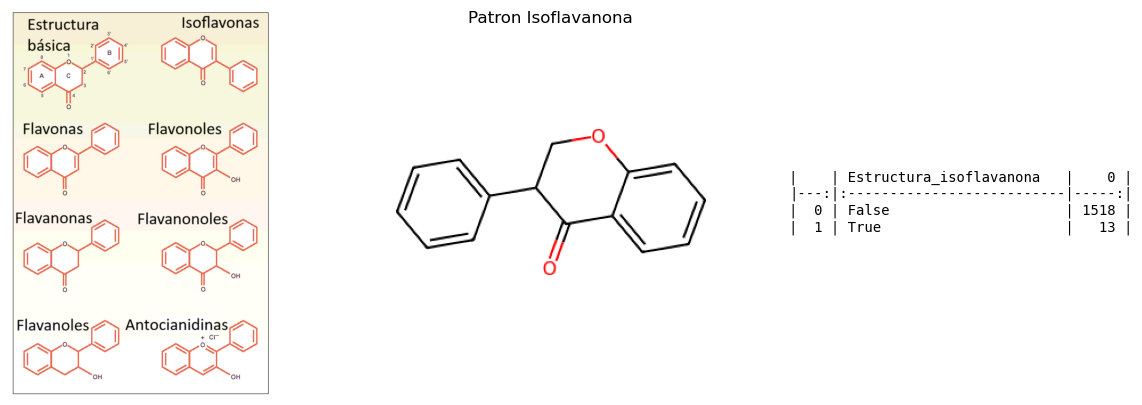

In [40]:

# Función para verificar si una molécula contiene la estructura del isoflavanona
def verificar_isoflavanona(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_isoflavanona)
    else:
        return False  # Si la molécula no se puede convertir, asumimos que no contiene el isoflavanona
        
#Buscar Isoflavonas
smiles_isoflavanona = "C1C(C(=O)C2=CC=CC=C2O1)C3=CC=CC=C3"
imagen_isoflavanona = plot_molecula(smiles_isoflavanona)
patron_isoflavanona = Chem.MolFromSmiles(smiles_isoflavanona)
# Aplicar la función a la columna SMILES para verificar si es o no_isoflavanona
df['Estructura_isoflavanona'] = df['SMILES'].apply(verificar_isoflavanona)
#Agrupar
grupo_isoflavanona = df.groupby('Estructura_isoflavanona').size()
grupo_isoflavanona_md = grupo_isoflavanona.reset_index().to_markdown()

#Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Subplot 1 = Cargar y mostrar la imagen de flavonoides
ruta_imagen = "imgs/flavsimg.png"
imagen = Image.open(ruta_imagen)
axs[0].imshow(imagen)
axs[0].axis('off')
# Subplot 2 = Graficar N°O con doble enlace
axs[1].imshow(imagen_isoflavanona)
axs[1].set_title("Patron Isoflavanona")
axs[1].axis('off')
#Subplot 3 = Mostrar Markdown
axs[2].axis('off')
axs[2].text(0.5, 0.5, grupo_isoflavanona_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Mostrar el gráfico
plt.show()

In [ ]:
#Buscar Flavonas
# Función para verificar si una molécula contiene la estructura de la flavona
def verificar_flavona(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_flavona)
    else:
        return False  

#Patron Flavona
smiles_flavona = "C1=CC=C(C=C1)C2=CC(=O)C3=CC=CC=C3O2"
imagen_flavona = plot_molecula(smiles_flavona)
patron_flavona = Chem.MolFromSmiles(smiles_flavona)
# Aplicar la función a la columna SMILES para verificar si es o no Flavona
df['Estructura_flavona'] = df['SMILES'].apply(verificar_flavona)
grupo_flavona = df.groupby('Estructura_flavona').size()
grupo_flavona_md = grupo_flavona.to_markdown()

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
#Subplot 1 = "Flavona"
axs[0].set_title("Patrón Flavona")  # Título para la imagen 1
# Mostrar la imagen de la molécula en el primer subplot
axs[0].imshow(imagen_flavona)
#Subplot 2 = "Estructura flavonoides"
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
# Subplot 3 = Markdown
axs[2].text(0.5, 0.5, grupo_flavona_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Mostrar el gráfico
plt.show()

In [ ]:
# Buscar Flavonoles
# Función para verificar si una molécula contiene la estructura de la flavona
def verificar_flavonol(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_flavonol)
    else:
        return False  
        
smiles_flavonol =("C1=CC=C(C=C1)C2=C(C(=O)C3=CC=CC=C3O2)O")
imagen_flavonol = plot_molecula(smiles_flavonol)
patron_flavonol = Chem.MolFromSmiles(smiles_flavonol)
# Aplicar la función a la columna SMILES para verificar si es o no flavonol
df['Estructura_flavonol'] = df['SMILES'].apply(verificar_flavonol)
grupo_flavonol = df.groupby('Estructura_flavonol').size()
grupo_flavonol_md = grupo_flavonol.to_markdown()


# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
#Subplot 1 = "Flavonol
axs[0].set_title("Patrón Flavonol")  # Título para la imagen 
axs[0].imshow(imagen_flavonol)
# Subplot 2 = "Estructura flavonoides
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
# Subplot 3 = Markdown
axs[2].text(0.5, 0.5, grupo_flavonol_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Mostrar el gráfico
plt.show()

In [33]:
# Condiciones para asignar valores a 'Tipo_flavonoide'
# Obtener el valor actual de 'Tipo_flavonoide' si no cumple ninguna condición
valor_actual = df['Tipo_flavonoide']

condiciones = [
    (df['Estructura_flavona'] == True) & (df['Estructura_flavonol'] == False),
    (df['Estructura_flavona'] == True) & (df['Estructura_flavonol'] == True)
]
# Valores correspondientes a las condiciones
valores = ['Flavona', 'Flavonol']
# Asignar valores a la columna 'Tipo_flavonoide' según las condiciones sin modificar los valores actuales
df['Tipo_flavonoide'] = np.select(condiciones, valores, default=valor_actual)
# Verificar el resultado
df[['Estructura_flavona', 'Estructura_flavonol', 'Tipo_flavonoide']].sample(n=10)

KeyError: 'Estructura_flavona'

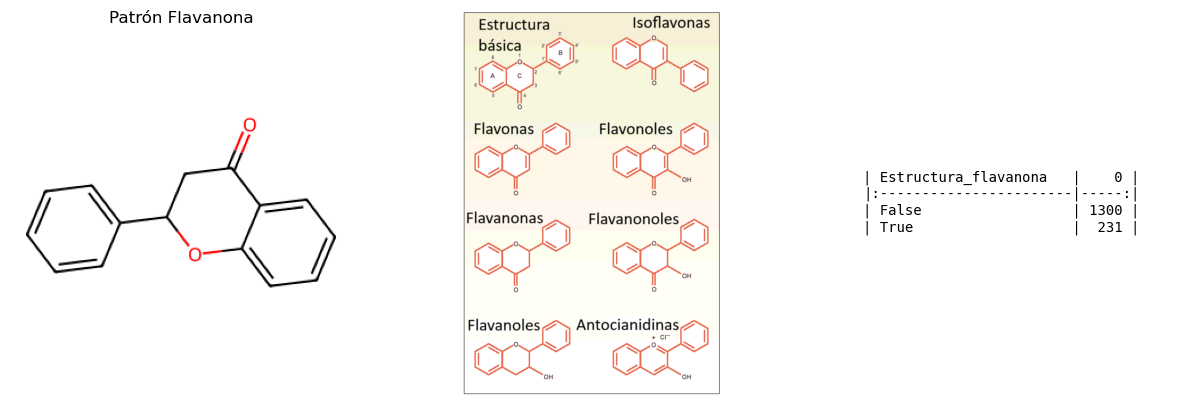

In [34]:
# Buscar flavanona
# Función para verificar si una molécula contiene la estructura de la flavanona
def verificar_flavanona(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_flavanona)
    else:
        return False  

smiles_flavanona =("C1C(OC2=CC=CC=C2C1=O)C3=CC=CC=C3")
imagen_flavanona = plot_molecula(smiles_flavanona)
patron_flavanona = Chem.MolFromSmiles(smiles_flavanona)
# Aplicar la función a la columna SMILES para verificar si es o no Flavonol
df['Estructura_flavanona'] = df['SMILES'].apply(verificar_flavanona)
grupo_flavanona = df.groupby('Estructura_flavanona').size()
grupo_flavanona_md = grupo_flavanona.to_markdown()

#Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
# Subplot 1 = "Flavanona"
axs[0].set_title("Patrón Flavanona")  # Título para la imagen 1
axs[0].imshow(imagen_flavanona)
# Subplot 2 = "Estructura Flavonoides"
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
# Subplot 3 = "Markdown"
axs[2].text(0.5, 0.5, grupo_flavanona_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Mostrar el gráfico
plt.show()

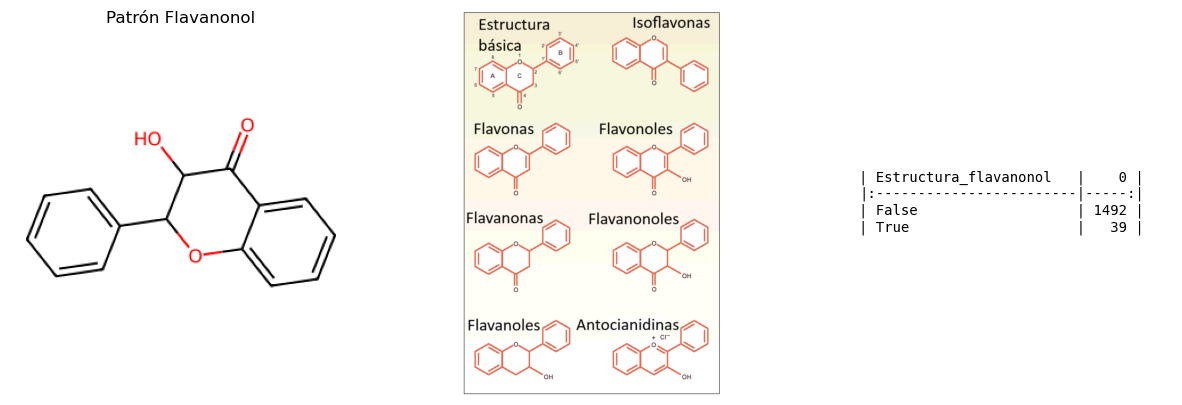

In [35]:
# Buscar flavanonol
# Función para verificar si una molécula contiene la estructura de la flavona
def verificar_flavanonol(smiles_molecula):
    mol = Chem.MolFromSmiles(smiles_molecula)
    if mol:
        return mol.HasSubstructMatch(patron_flavanonol)
    else:
        return False  

# Buscar flavanonol
smiles_flavanonol =("C1(O)C(OC2=CC=CC=C2C1=O)C3=CC=CC=C3")
patron_flavanonol = Chem.MolFromSmiles(smiles_flavanonol)
imagen_flavanonol = plot_molecula(smiles_flavanonol)
# Aplicar la función a la columna SMILES para verificar si es o no Flavanonol
df['Estructura_flavanonol'] = df['SMILES'].apply(verificar_flavanonol)
grupo_flavanonol = df.groupby('Estructura_flavanonol').size()
grupo_flavanonol_md = grupo_flavanonol.to_markdown()

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Ajusta el tamaño de la figura
# Eliminar los ejes de todas las imágenes
for ax in axs:
    ax.axis('off')
# Subplot 1 = "Flavanonol"
axs[0].set_title("Patrón Flavanonol")  # Título para la imagen 1
axs[0].imshow(imagen_flavanonol)
# Subplot 2 = "Estructura Flavonoides"
imagen = Image.open(ruta_imagen)
axs[1].imshow(imagen)
# Subplot 3 = "Markdown"
axs[2].text(0.5, 0.5, grupo_flavanonol_md, ha='center', va='center', fontsize=10, color='black', fontfamily='monospace')
# Mostrar el gráfico
plt.show()

In [36]:
# Condiciones para asignar valores a 'Tipo_flavonoide'
condiciones = [
    (df['Estructura_flavanona'] == True) & (df['Estructura_flavanonol'] == False),
    (df['Estructura_flavanona'] == True) & (df['Estructura_flavanonol'] == True)
]

# Valores correspondientes a las condiciones
valores = ['Flavanona', 'Flavanonol']
# Obtener el valor actual de 'Tipo_flavonoide' si no cumple ninguna condición
valor_actual = df['Tipo_flavonoide']
# Asignar valores a la columna 'Tipo_flavonoide' según las condiciones sin modificar los valores actuales
df['Tipo_flavonoide'] = np.select(condiciones, valores, default=valor_actual)
# Verificar el resultado
df[['Estructura_flavanona', 'Estructura_flavanonol', 'Tipo_flavonoide']].sample(n=10)

,Estructura_flavanona,Estructura_flavanonol,Tipo_flavonoide
932,True,False,Flavanona
806,False,False,Otro
1116,False,False,Otro
213,False,False,Otro
954,False,False,Otro
1511,False,False,Otro
1412,False,False,Otro
787,False,False,Otro
911,False,False,Otro
1099,False,False,Otro


In [37]:
df = df.drop(columns=['Estructura_isoflavona', 'Estructura_isoflavanona', 'Estructura_flavona', 'Estructura_flavonol', 'Estructura_flavanona', 'Estructura_flavanonol','Estructura_flavanol'])


KeyError: "['Estructura_isoflavanona', 'Estructura_flavona', 'Estructura_flavonol'] not found in axis"

In [38]:
df[['ChEBI Name', 'SMILES', 'Tipo_flavonoide']].sample(n=10)

,ChEBI Name,SMILES,Tipo_flavonoide
146,"(2S)-5,7,3',4'-Tetrahydroxyflavanone 7-(6-p-co...",O1C([C@@H](O)[C@H](O)C(O)[C@@H]1OC=2C=C3O[C@@H...,Flavanona
754,"5,3'-Dihydroxy-6,7,4'-trimethoxyflavanone",O1C(CC(=O)C=2C1=CC(OC)=C(OC)C2O)C3=CC(O)=C(OC)...,Flavanona
1344,Licorice glycoside C1,O(C1[C@@H](O)[C@H](O)C(O[C@H]1OC2=CC=C([C@@H]3...,Flavanona
936,Keioside,O1C(C(O)C(O)C(O)C1OC2=C(OC=3C(C2=O)=C(O)C=C(O)...,Otro
1327,6-Hydroxyluteolin 6-xyloside,O1[C@@H](OC2=C(O)C3=C(OC(=CC3=O)C4=CC(O)=C(O)C...,Otro
1509,"3,7-Dihydroxy-8-methylflavone 7-rhamnosyl-(1->...",O([C@@H]1C(O)[C@H](O)[C@@H](OC1C)OCC2O[C@@H](O...,Otro
713,"6-{[2-(3,4-dihydroxyphenyl)-5-hydroxy-4-oxo-8-...",O1C(C(O)C(O)C(O)C1CO)C2=C(OC3OC(C(O)C(O)C3O)C(...,Otro
1032,Nelumboside,O([C@H]1[C@H](O)[C@@H](O)[C@@H](O[C@@H]1C(O)=O...,Otro
1026,"6-{[6-(3,4-dihydroxy-6-methyl-5-oxooxan-2-yl)-...",O1C(OC2=C(C3OC(C(=O)C(O)C3O)C)C(O)=C4C(OC(=CC4...,Otro
803,"Chalconaringenin 2',4'-di-O-glucoside",O1C([C@@H](O)[C@H](O)C(O)[C@@H]1OC2=CC(O[C@@H]...,Otro


In [39]:
# Verificar si quedo algun Tipo_flavonoide vacío
indices_tipo_flavonoide_vacio = df[df['Tipo_flavonoide'].isna()].index
# Verificar los índices obtenidos
print(indices_tipo_flavonoide_vacio)

Index([], dtype='int64')


In [59]:
#Borrar un índice a proposito para luego verificar 
df.at[8, 'Tipo_flavonoide'] = ''
# Verificar el cambio
print(df.loc[1])

ChEBI ID                                                             191634
ChEBI Name                                       Neoliquiritin 2''-apioside
SMILES                    O(C1C(O)C(O)C(OC1OC2=CC=3OC(CC(=O)C3C=C2)C4=CC...
SID                                                                85390422
CID                                                               131752849
N°Carbonos                                                               26
N°S                                                                       0
N°N                                                                       0
N°Anillos                                                                 5
N°Aromaticos                                                              2
N°Oxigenos                                                               13
N°Oxigenos_DobleEnlace                                                    1
Tipo_flavonoide                                                   Flavanona
Name: 1, dty

In [60]:
# Filtrar las filas donde 'Tipo_flavonoide' está vacío
indices_tipo_flavonoide_vacio = df[df['Tipo_flavonoide'] == ''].index

# Verificar los índices obtenidos
print(indices_tipo_flavonoide_vacio)

Index([8], dtype='int64')


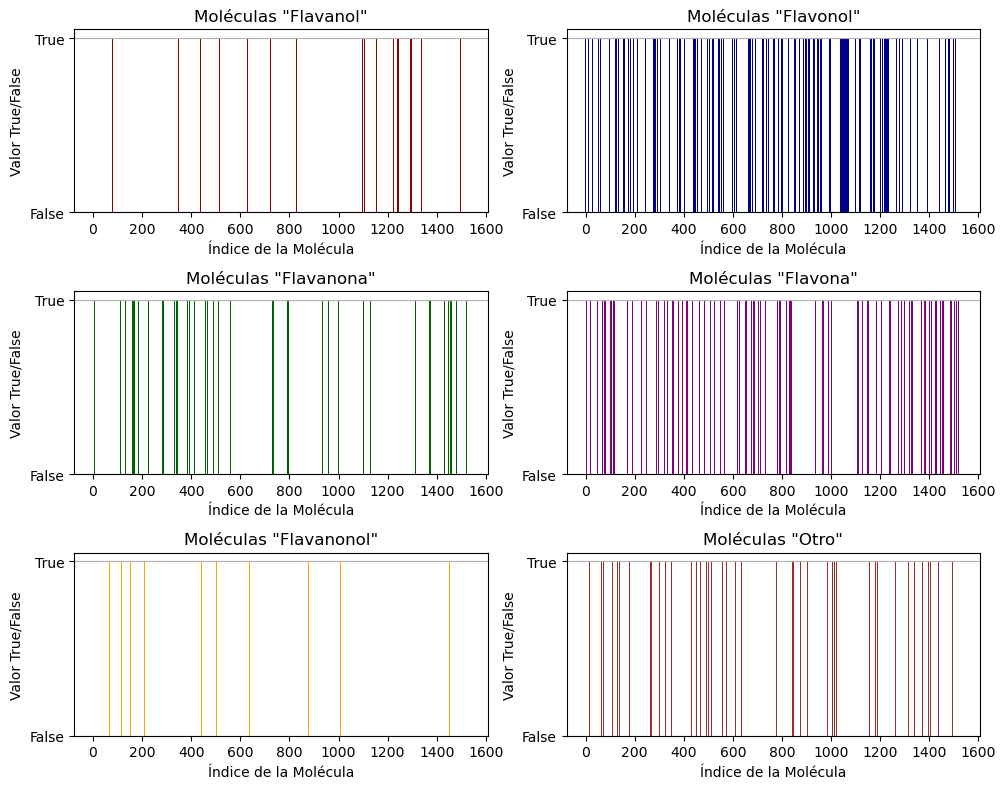

In [61]:
# Obtener un array de los tipos de flavonoides
array_tipos_flavonoide = np.array(df['Tipo_flavonoide'])

# Crear un array de True/False para cada tipo de flavonoide
valores_flavanol = array_tipos_flavonoide == 'Flavanol'
valores_flavonol = array_tipos_flavonoide == 'Flavonol'
valores_flavanona = array_tipos_flavonoide == 'Flavanona'
valores_flavona = array_tipos_flavonoide == 'Flavona'
valores_flavanonol = array_tipos_flavonoide == 'Flavanonol'
valores_otro = array_tipos_flavonoide == 'Otro'

# Crear Subplots
plt.figure(figsize=(10, 8))

# Gráfico para Flavanol
plt.subplot(3, 2, 1)
plt.bar(df.index, valores_flavanol, color=['darkred' if v else 'red' for v in valores_flavanol])
plt.title('Moléculas "Flavanol"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

# Gráfico para Flavonol
plt.subplot(3, 2, 2)
plt.bar(df.index, valores_flavonol, color=['darkblue' if v else 'blue' for v in valores_flavonol])
plt.title('Moléculas "Flavonol"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

# Gráfico para Flavanona
plt.subplot(3, 2, 3)
plt.bar(df.index, valores_flavanona, color=['darkgreen' if v else 'green' for v in valores_flavanona])
plt.title('Moléculas "Flavanona"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

# Gráfico para Flavona
plt.subplot(3, 2, 4)
plt.bar(df.index, valores_flavona, color=['purple' if v else 'violet' for v in valores_flavona])
plt.title('Moléculas "Flavona"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

# Gráfico para Flavanonol
plt.subplot(3, 2, 5)
plt.bar(df.index, valores_flavanonol, color=['orange' if v else 'yellow' for v in valores_flavanonol])
plt.title('Moléculas "Flavanonol"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

# Gráfico para Otro
plt.subplot(3, 2, 6)
plt.bar(df.index, valores_otro, color=['brown' if v else 'pink' for v in valores_otro])
plt.title('Moléculas "Otro"')
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

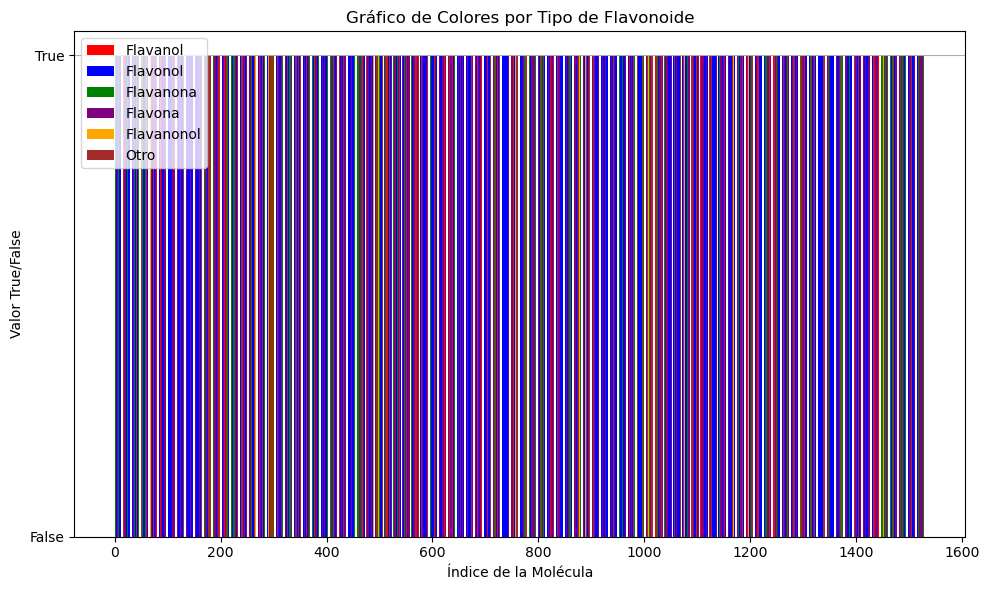

In [62]:
# Obtener un array de los tipos de flavonoides
array_tipos_flavonoide = np.array(df['Tipo_flavonoide'])

# Definir los colores para cada tipo de flavonoide
colores = {
    'Flavanol': 'red',
    'Flavonol': 'blue',
    'Flavanona': 'green',
    'Flavona': 'purple',
    'Flavanonol': 'orange',
    'Otro': 'brown'
}

# Crear Subplots
plt.figure(figsize=(10, 6))

# Graficar cada tipo de flavonoide con su respectivo color
for tipo_flavonoide in colores:
    indices = array_tipos_flavonoide == tipo_flavonoide
    plt.bar(df.index[indices], np.ones_like(df.index[indices]), color=colores[tipo_flavonoide], label=tipo_flavonoide)

# Configuración adicional del gráfico
plt.xlabel('Índice de la Molécula')
plt.ylabel('Valor True/False')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(axis='y')
plt.legend()
plt.title('Gráfico de Colores por Tipo de Flavonoide')
#Mostrar Plot
plt.tight_layout()
plt.show()

Índice aleatorio: 911
SMILES de la molécula:
ChEBI ID                                                             185658
ChEBI Name                                              5-O-Methylhoslundin
SMILES                    O1C=2C(=C(OC)C(=C(OC)C2)C=3C(=O)C(OC)=C(OC3)C)...
SID                                                                85384522
CID                                                                15726099
N°Carbonos                                                               24
N°S                                                                       0
N°N                                                                       0
N°Anillos                                                                 4
N°Aromaticos                                                              4
N°Oxigenos                                                                7
N°Oxigenos_DobleEnlace                                                    2
Tipo_flavonoide                            

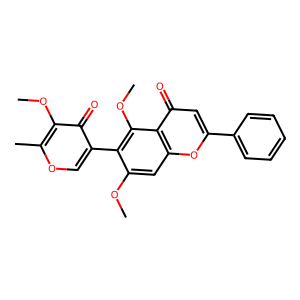

In [65]:
 #Supongamos que df es tu DataFrame
# Elegir un índice aleatorio del DataFrame
indice_aleatorio = df.sample().index[0]

# Obtener el SMILES correspondiente al índice aleatorio
smiles_molecula = df.loc[indice_aleatorio, 'SMILES']

# Mostrar el índice aleatorio y el SMILES de la molécula
print("Índice aleatorio:", indice_aleatorio)
print("SMILES de la molécula:")
print(df.loc[indice_aleatorio])
print()

# Llamar a la función para mostrar la molécula correspondiente al índice aleatorio
mostrar_molecula(smiles_molecula)  # Asegúrate de tener la función mostrar_molecula definida